# import block

As all python package we have to import PCI_o_B :

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PCI_o_B
from PCI_o_B import CIfile as CI
from PCI_o_B import G2file as g2
from PCI_o_B import SharedFunctions as sf

# CI.CI()

The class CI is defined in the CIfile. the class has several method and attributes.

Before each action we need to create we have to create an object CI. When a CI object is created you can upload the CI. This class has 3 different methods to upload the CI


 # 1) CI.LoadCI(Foldername, lag time, Normalization = True) :
 
This method allow to upload standard CI output of the option 101 of the program Analysis.

It requires:
Foldername (neme of the folder where the Correlations are saved), lag time [s] (inverse of the frame reate of the video). 

There is the option to perform the geometrical everage (Normalization = True).
There is a second options you can run: Timepulse = True, to upload correlation if TimePulses scheme, it requires however that the correlations are trated with the function 209 of Analysis. This options is deprecated use CI.LoadTimePulse and the Normalization is not available


# 2) CI.LoadTimePulse(Foldername, Normalization = True) :
 
This method allow to upload CI output of the option 101 of the program Analysis when the MI files were taken with the Timepulse scheme.

It requires:
Foldername (neme of the folder where the Correlations are saved), lag time [s] (inverse of the frame reate of the video).

There is the option to perform the geometrical everage (Normalization = True).

This method is still very slow especially if runned with the normalization option


# 3) CI.Quick_Load(FolderName) :

This method shold be used to upload the CI once that thery are already saved with the method CI.Save_CSV().


In [4]:
# CI creation and loading

myCI = CI.CI() 
myCI.LoadTimePulseCI('E:\\Matteo\\PHD\\light_scattering\\20210628_silicaTM30_40ul_1Murea_100units_01Vf_300mW_2_dry_1_H2O\\Cam1\\exptime_0.070000\\out13',Normalization = True)


normalization of ROI 1 over 13
normalization of ROI 2 over 13
normalization of ROI 3 over 13
normalization of ROI 4 over 13
normalization of ROI 5 over 13
normalization of ROI 6 over 13
normalization of ROI 7 over 13
normalization of ROI 8 over 13
normalization of ROI 9 over 13
normalization of ROI 10 over 13
normalization of ROI 11 over 13
normalization of ROI 12 over 13
normalization of ROI 13 over 13
[-1e-06, 0.004999]
time = 2021-07-01 17:01:41.900152
Calculating cIs for all available time delays (in sec), for ROI 1 over 13
time = 2021-07-01 17:02:09.520234
Calculating cIs for all available time delays (in sec), for ROI 2 over 13
time = 2021-07-01 17:02:38.243059
Calculating cIs for all available time delays (in sec), for ROI 3 over 13
time = 2021-07-01 17:03:07.353090
Calculating cIs for all available time delays (in sec), for ROI 4 over 13
time = 2021-07-01 17:03:35.865969
Calculating cIs for all available time delays (in sec), for ROI 5 over 13
time = 2021-07-01 17:04:04.467128


We have now created an object myCI and loaded the CI. To check the general caracteristic of our myCI we can run the command print(myCI)

In [5]:
print(myCI)


|---------------|
| CI class:    
|--------------------+--------------------|
| folder         : E:\Matteo\PHD\light_scattering\20210628_silicaTM30_40ul_1Murea_100units_01Vf_300mW_2_dry_1_H2O\Cam1\exptime_0.070000\out13
| number of ROIs : 13
| ROIs size      : [129, 100] px
| lag time       : 0.0050 s
| timepulse      : True
|--------------------+--------------------|


The CI for each ROI is stored in Pandas DataFrame. to access the CI of an ROI (the first for example):

In [6]:
myCI.CI[0]

,tsec,n,0.000e+00 s,5.000e-03 s,8.850e-03 s,1.580e-02 s,2.810e-02 s,5.000e-02 s,8.890e-02 s,1.581e-01 s,...,7.200e+01 s,8.400e+01 s,1.000e+02 s,1.300e+02 s,1.600e+02 s,2.000e+02 s,4.000e+02 s,6.000e+02 s,8.000e+02 s,1.000e+03 s
0,0.00000,1,0.976809,0.96807,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0786482,0.050571,0.0467994,0.0173289,0.0245032,0.0698529,0.0356236,0.0584909,0.106774,0.0425545
1,0.00500,2,0.990783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0848503,0.0521778,0.0557707,-0.00569316,0.0203439,0.0667773,0.0523579,0.0615617,0.0950278,0.0507281
2,2.00000,3,0.920326,NaN,0.982142,NaN,NaN,NaN,NaN,NaN,...,0.0585787,0.0454479,0.0334708,0.0193891,0.0140131,0.0232164,0.0504878,0.0435565,0.0704606,0.0301996
3,2.00885,4,0.913542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0564371,0.0230332,0.0378096,0.0137422,0.0105724,0.018923,0.0484137,0.0402306,0.0816368,0.0177431
4,4.00000,5,0.97949,NaN,NaN,0.919045,NaN,NaN,NaN,NaN,...,0.0597953,0.0468997,0.0666662,0.00609177,0.0508119,0.0368158,0.0288282,0.0631726,0.0499633,0.00920295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1754.50000,1756,1.03636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,1756.00000,1757,1.03286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,1756.88910,1758,1.02367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,1758.00000,1759,1.02663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This class has a method to plot the Ci for all the different ROI:

# 4) CI.CIShow()

This method takes as argument the ROI that we want to plot

directory already existing, graphs will be uploaded


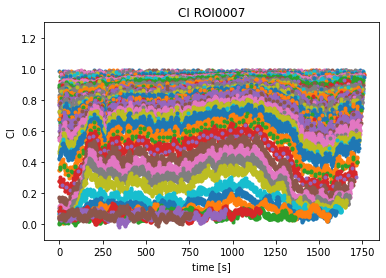

In [7]:
# plot of the CI
myCI.CIShow(7)


# 4) CI.Save_CSV()

This class has a method to save the CI, recommended if the Ci were loaded with the method CI.LoadTimePulse() in a second time the I will be able to use CI.CI.Quick_Load(). The method creats automaticcally a folder \\processed_CI in which it saves the CIs, separatly it also save a file with the lagtime list.

In [8]:
myCI.Save_CSV()

In [18]:
myCI_2 = CI.CI() 
myCI_2.Quick_Load('E:\\Matteo\\PHD\\light_scattering\\20210628_silicaTM30_40ul_1Murea_100units_01Vf_300mW_2_dry_1_H2O\\Cam1\\exptime_0.070000\\out13\\processed_CI')

# G2.G2()


Once that the CI is loaded, it is possible to create a G2 object.
For the cration of G2 object we need to provide:

    - foldermane
    - CIs to process
    - number of ROI
    - delay time
    
all this feature can be passed from the CI class we have just created. 



In [19]:
myG2 = g2.G2(FolderName = myCI_2.FolderName, Timepulse = False)


# 1) G2.G2Calculation()

Once that the G2 object is created we can compute the G2 with the method G2.G2Calculation(), as arguments it takes starting and and end time over which the G2 will be calculated (this values must be integers). If no value is given the G2 is calulated over the entire duration of the CI

In [21]:
t1 = int(10)
t2 = int(1700)
myG2.G2Calculation(CI = myCI_2.CI, nROI = myCI_2.nROI,tau = myCI_2.tau,t1,t2)

# 2) G2.G2Show()

This method allow us to plot the G2, as asrguments it accapts the number of ROI we want to plot or the 'all' in case we want to see all the ROIs at the same time

directory already existing, graphs will be uploaded


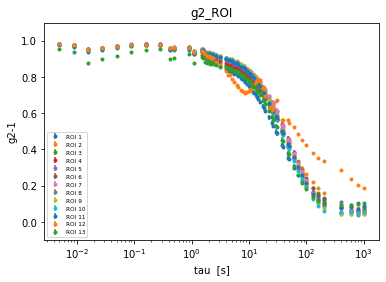

In [24]:
myG2.G2Show('all')

# 3) G2.G2Flactuations()

This method allow us to plot the variance of the G2, as asrguments it accapts the number of ROI we want to plot or the 'all' in case we want to see all the ROIs at the same time

directory already existing, graphs will be uploaded


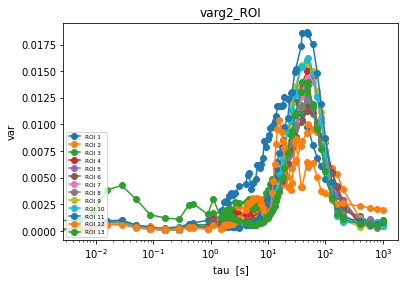

In [23]:
myG2.G2ShowFlactuations('all')

# 4) G2 maniplation

This class has several methods to treats the G2:
    - G2.G2CutBaseLine(nPoints=n), cut the last points of the G2, takes the number of points to cut
    - G2.G2Set0Baseline(), normalise at 0 the baseline of the CI
    - G2.G2Normalize(), streches the intercept of the G2 at 1

directory already existing, graphs will be uploaded


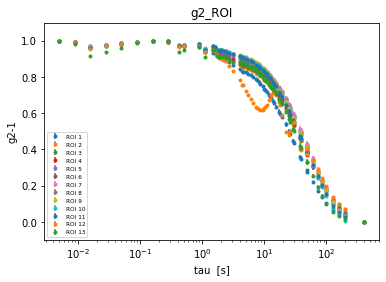

In [25]:
myG2.G2CutBaseLine(nPoints=3)
myG2.G2Set0Baseline()
myG2.G2Normalize()
myG2.G2Show('all')

# 5) fit decaytime

The class has also several methods to fit the G2 and obtain the decay time. As argument, each method takes the list of starting point for the fit and the keyword plot (True or False).

    -> one decay time
    -G2.FitSingleDecaytime(variables,plot=True)
        variables = [amp, decay, baseline]
    -G2.FitStretchDecaytime(variables,plot=True)
        variables = [amp, decay, baseline, beta]
    
    -> two  decay time
    -G2.FitDoubleDecaytime(variables,plot=True)
        variables = [amp1, decay1, amp2, decay2, baseline]
    -G2.FitSingleStretchDecaytime(variables,plot=True)
        variables = [amp1, decay1, amp2, decay2, baseline, beta]
    -G2.FitDoubleStretchDecaytime(variables,plot=True)
        variables = [amp1, decay1, amp2, decay2, baseline, beta, gamma]
    
    -> three decay time
    -G2.FitTripleDecaytime(variables,plot=True)
        variables = [amp1, decay1, amp2, decay2, amp3, decay3, baseline]
    
In case is not possible to fit the G2 with one of these curves there is also a method that calculates the area as the integral

    - G2.G2AreaDecaytime()

c:\users\matteo\anaconda3\envs\dlsenv\src\pci-o-b\PCI_o_B\SharedFunctions.py:102: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(f , x0, xmax)


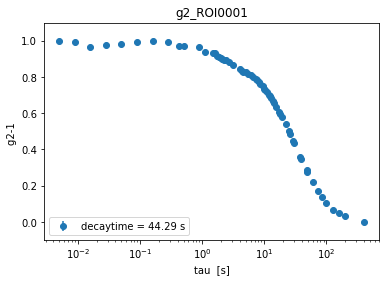

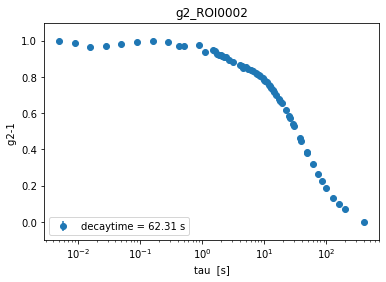

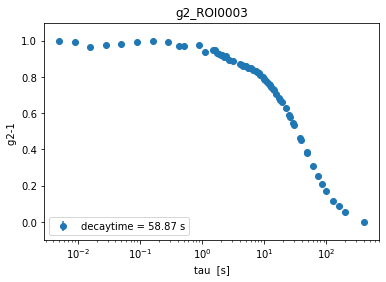

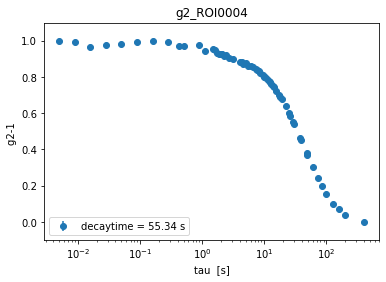

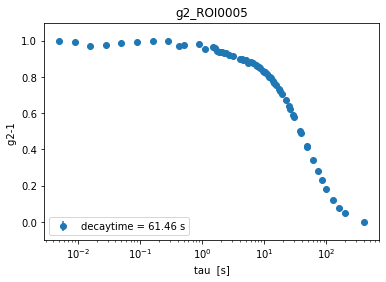

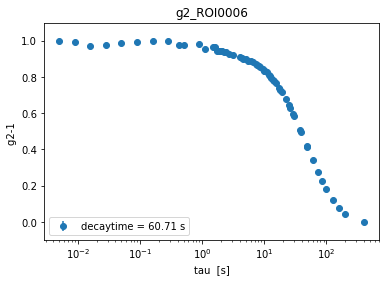

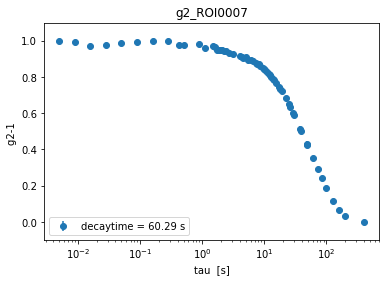

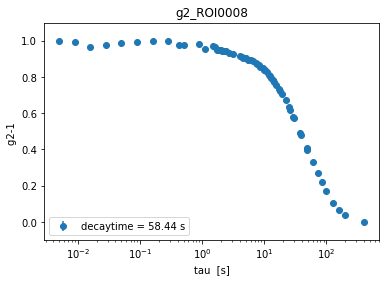

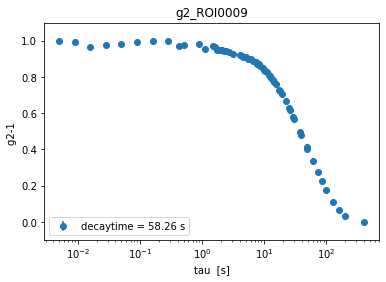

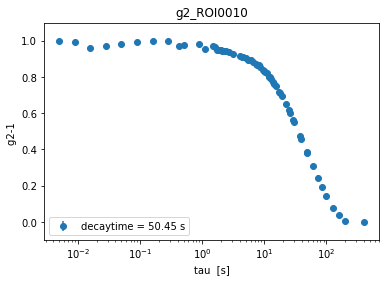

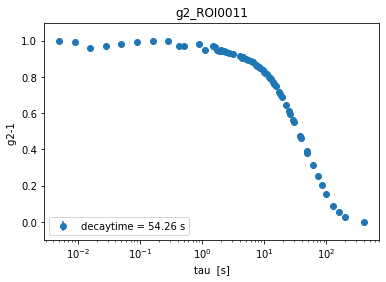

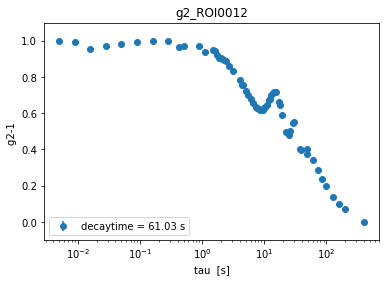

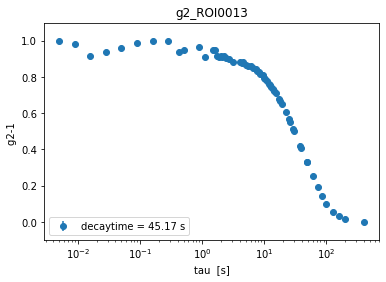

In [26]:
myG2.G2AreaDecaytime()